In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [ ]:
def add_noise(images):
  noise_factor=0.5
  noisy_images = images + noise_factor * np.random.randn(*images.shape)
  return np.clip(noisy_images,0.,1.)

In [ ]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [ ]:
def b():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(28*28,activation='sigmoid'))
  model.add(Reshape((28,28,1)))
  return model

In [ ]:
autoencoder = b()
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
autoencoder.fit(x_train_noisy,x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test_noisy,x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0777 - val_loss: 0.0321
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0300 - val_loss: 0.0243
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0236 - val_loss: 0.0208
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0205 - val_loss: 0.0190
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189 - val_loss: 0.0180
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0171 - val_loss: 0.0169
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0168 - val_loss: 0.0167
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0167 - val_loss: 0.0166


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

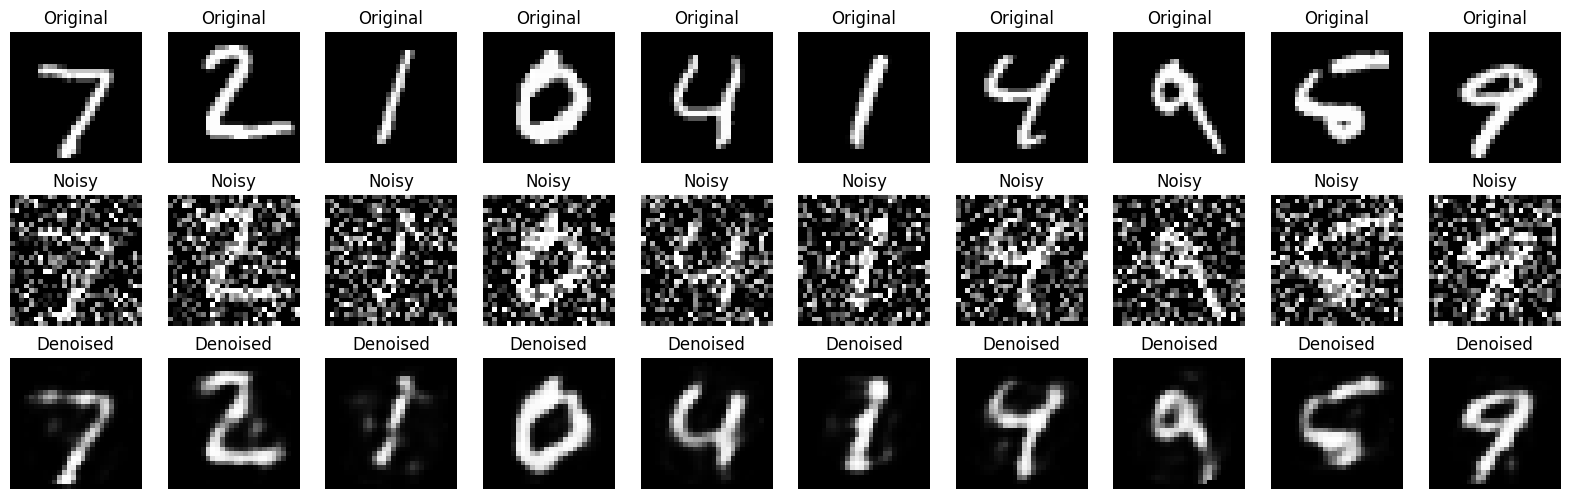

In [ ]:
deno = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20,6))
for i in range(10):

  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='grey')
  plt.title("Original")
  plt.axis('off')

  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='grey')
  plt.title("Noisy")
  plt.axis('off')

  ax = plt.subplot(3,n,i+1+2*n)
  plt.imshow(deno[i].reshape(28,28),cmap='grey')
  plt.title("Denoised")
  plt.axis('off')

plt.show